In [1]:
# Reason why we have the getOrCreate code
# http://stackoverflow.com/questions/28999332/how-to-access-sparkcontext-in-pyspark-script
sc = SparkContext.getOrCreate()


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline

In [3]:
kpop = sc.textFile("kpop_data.txt")
kpop.count() # lines
# tweets: 180060 from kpop data collection


658646

In [4]:
def split_words(line):
    return line.split()

def create_pair(word):
    return (word,1)

def sum_counts(a,b):
    return a + b

def lower(line):
    return line.lower()

def starts_with_hashtag(hashtag):
    return hashtag.startswith("#")

def starts_with_RT(RT):
    return RT.startswith("RT")

def starts_with_users(users):
    return users.stratswith("@")
    


In [9]:
kpop.take(5)

In [5]:
# RT total
number_kpop_retweets = kpop.filter(starts_with_RT).count()
number_kpop_retweets

162272

In [6]:
# RT user's names frequency 
kpop_r = kpop.filter(starts_with_RT)
kpop_r_fre = kpop_r.flatMap(split_words).map(lower).map(create_pair).reduceByKey(sum_counts).collect()

In [7]:
kpop_r_fre = pd.DataFrame(kpop_r_fre)
kpop_r_fre = kpop_r_fre.rename(index = int, columns = {0 : "users", 1 :"freq"})

In [8]:
kpop_r_fre = kpop_r_fre.sort_values(by = "freq", ascending = False)

In [9]:
# get all @ -> Series panda -> use string method !!
a = kpop_r_fre["users"]
b = pd.Series(a)
c=b.str.contains('@', na =False, regex =True)
kpop_r_fre = kpop_r_fre[c]


In [10]:
# top 10 users
kpop_top10Users = kpop_r_fre[kpop_r_fre["freq"] > 3061]
kpop_top10Users

,users,freq
13430,@bts_bighit:,23933
11704,@bts_twt,17886
968,@kookbeingextra:,4114
13610,@mygscene:,4016
135,@spotlightrm:,3493
37,@beijiwoo:,3449
93,@btschartdata:,3255
11860,@soompi:,3246
31,@glenda99654849:,3088
20187,@twitter,3065


<BarContainer object of 10 artists>

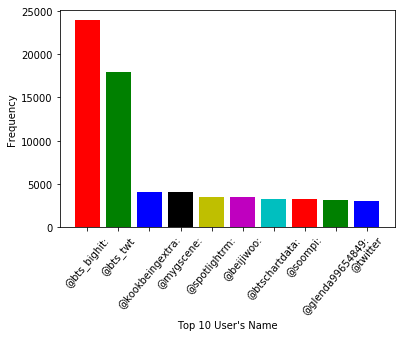

In [11]:
#Let's plot!
x = kpop_top10Users["users"]
y = kpop_top10Users["freq"]
plt.xlabel("Top 10 User's Name")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8, color='rgbkymc')


In [12]:
#total hashtag 
number_kpop_hashtag = kpop.filter(starts_with_hashtag).count()
number_kpop_hashtag

28644

In [13]:
# Hashtag frequency 
kpop_h = kpop.filter(starts_with_hashtag)
kpop_h_fre = kpop_h.flatMap(split_words).map(lower).map(create_pair).reduceByKey(sum_counts).collect()

In [14]:
# To Data Frame 
kpop_h_fre = pd.DataFrame(kpop_h_fre)
kpop_h_fre = kpop_h_fre.rename(index = int, columns = {0 : "hashtag", 1 :"freq"})

In [15]:
# Sorting 
kpop_h_fre = kpop_h_fre.sort_values(by = "freq", ascending = False)
#kpop_h_fre.head

In [16]:
# get all hashtags -> Series panda -> use string method !!
a = kpop_h_fre["hashtag"]
b = pd.Series(a)
c=b.str.contains('#', na =False, regex =True)
kpop_h_fre = kpop_h_fre[c]


In [17]:
# top 10 hashtag
kpop_top10Hashtag = kpop_h_fre.drop([ 5, 2, 1858, 158, 1989, 23, 1849])
kpop_top10Hashtag = kpop_top10Hashtag[kpop_top10Hashtag["freq"] > 700]

In [18]:
# top 10 hashtag
kpop_top10Hashtag

,hashtag,freq
1824,#bts,5891
0,#mamavote,1474
6,#jimin,1444
1827,#happyjinday,1385
1986,#dope,1298
1864,#rm,1194
1873,#btsfanart,1114
79,#bt21,762
15,#got7,748
1976,#jk,719


<BarContainer object of 10 artists>

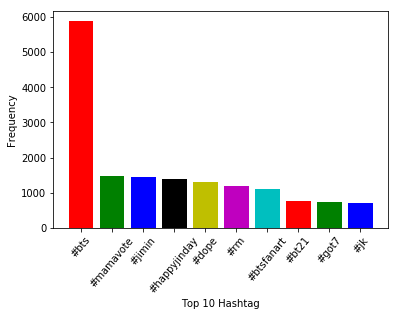

In [19]:
#Let's plot!
x = kpop_top10Hashtag["hashtag"]
y = kpop_top10Hashtag["freq"]
plt.xlabel("Top 10 Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8,  color='rgbkymc')


In [6]:
#total words
number_kpop_words = kpop.count()
number_kpop_words

658646

In [7]:
# words frequency 
kpop_w_fre = kpop.flatMap(split_words).map(lower).map(create_pair).reduceByKey(sum_counts).collect()

In [8]:
# To data frame
kpop_w_fre = pd.DataFrame(kpop_w_fre)
kpop_w_fre = kpop_w_fre.rename(index = int, columns = {0 : "words", 1 :"freq"})

In [9]:
# Sorting 
kpop_w_fre = kpop_w_fre.sort_values(by = "freq", ascending = False)
x = kpop_w_fre.sort_values(by = "freq", ascending = False)

In [10]:
# get all words -> Series panda -> use string method !!
a = kpop_w_fre["words"]
b = pd.Series(a)


In [11]:
# get rid of all hashtag users url symbols
c= b.str.contains("@", na =False, regex =True)
d= b.str.contains("#", na =False, regex =True)  
e= b.str.contains("http", na =False, regex =True)  

kpop_w_fre = kpop_w_fre[c == False]
kpop_w_fre = kpop_w_fre[d == False]
kpop_w_fre = kpop_w_fre[e == False]


C:\Users\Juyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Juyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [52]:
# Get rid of useless words
#kpop_w_fre

In [5]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [12]:
#sentiments
kpop_w_fre['SA'] = np.array([ analize_sentiment(word) for word in kpop_w_fre['words'] ])

In [14]:
# top 10 just words
top10words= kpop_w_fre.head(10)

<BarContainer object of 10 artists>

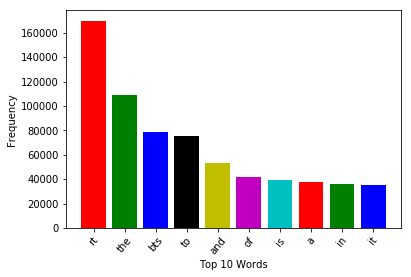

In [18]:
#Let's plot just words
x = top10words["words"]
y = top10words["freq"]
plt.xlabel("Top 10 Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8,  color='rgbkymc')

In [28]:
# top 10 significant words
kpop_top10Words = kpop_w_fre[kpop_w_fre['SA'] != 0].head(10)
kpop_top10Words

,words,freq,SA
618,full,25668,1
55358,most,17841,1
84,love,15447,1
55331,top,11265,1
30,other,5735,-1
55343,happy,5225,1
55508,first,5022,1
55484,funny,3753,1
138,really,3537,1
387,right,2877,1


<BarContainer object of 10 artists>

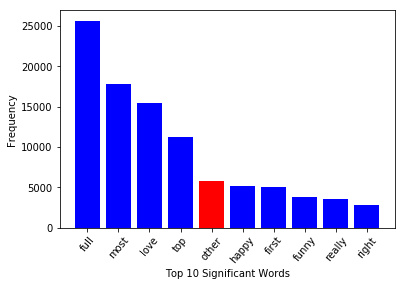

In [29]:
#Let's plot!
x = kpop_top10Words["words"]
y = kpop_top10Words["freq"]
plt.xlabel("Top 10 Significant Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8,  color='bbbbrbb')

In [30]:
pos_words = kpop_w_fre[kpop_w_fre['SA'] > 0]
neu_words = kpop_w_fre[kpop_w_fre['SA'] == 0]
neg_words = kpop_w_fre[kpop_w_fre['SA'] < 0]

In [31]:
pos_words.head(10)
neg_words.head(10)


,words,freq,SA
30,other,5735,-1
145,disliked,2746,-1
394,fake,2537,-1
55599,serious,2068,-1
55608,game,1429,-1
936,hate,1163,-1
411,down,976,-1
56205,less,697,-1
55540,hard,685,-1
55809,little,676,-1


<BarContainer object of 10 artists>

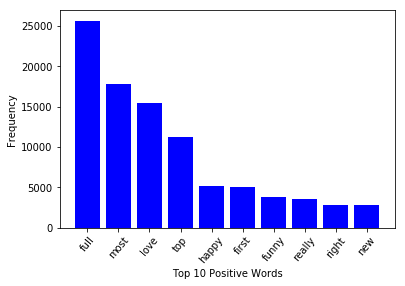

In [32]:
# Let's plot positive top 10
kpop_top10WordsPositive = pos_words.head(10)
x = kpop_top10WordsPositive["words"]
y = kpop_top10WordsPositive["freq"]
plt.xlabel("Top 10 Positive Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8,  color='b')

<BarContainer object of 10 artists>

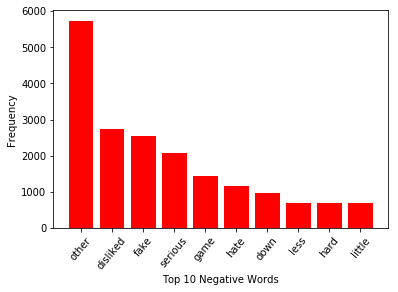

In [33]:
# Let's plot negative top 10
kpop_top10WordsNegative = neg_words.head(10)
x = kpop_top10WordsNegative["words"]
y = kpop_top10WordsNegative["freq"]
plt.xlabel("Top 10 Negative Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.bar(x, y, width = 0.8,  color='r')

In [34]:
n = (len(kpop_w_fre["words"]) - len(neu_words))
print("Percentage of positive tweets: {}%".format(len(pos_words)*100/n))
#print("Percentage of neutral tweets: {}%".format(len(neu_words)*100/len(kpop_w_fre["words"])))
print("Percentage de negative tweets: {}%".format(len(neg_words)*100/n))
print(len(pos_words), len(neg_words))

Percentage of positive tweets: 63.34321719792439%
Percentage de negative tweets: 36.65678280207561%
1709 989


In [35]:

print("Percentage of positive tweets: {}%".format(len(pos_words)*100/len(kpop_w_fre["words"])))
print("Percentage of neutral tweets: {}%".format(len(neu_words)*100/len(kpop_w_fre["words"])))
print("Percentage de negative tweets: {}%".format(len(neg_words)*100/len(kpop_w_fre["words"])))




Percentage of positive tweets: 1.9611668311491588%
Percentage of neutral tweets: 96.90390397282596%
Percentage de negative tweets: 1.1349291960248789%


In [36]:
#Check most 100 words
#kpop_w_fre[kpop_w_fre['SA'] != 0].head(100)

,words,freq,SA
618,full,25668,1
55358,most,17841,1
84,love,15447,1
55331,top,11265,1
30,other,5735,-1
55343,happy,5225,1
55508,first,5022,1
55484,funny,3753,1
138,really,3537,1
387,right,2877,1


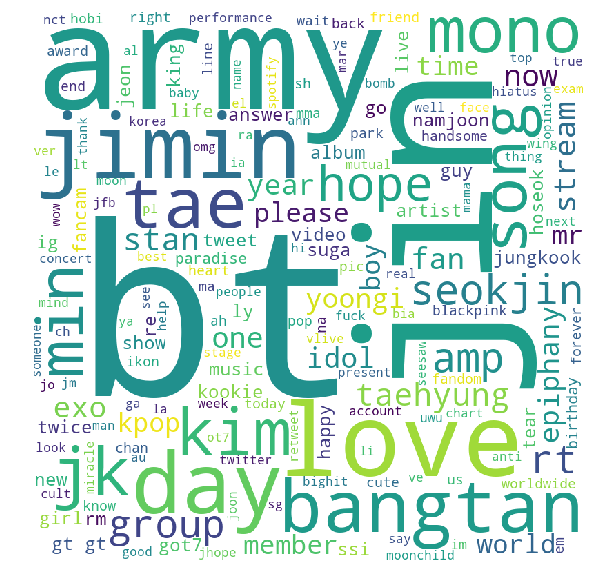

In [41]:
comment_words = ' '
stopwords = set(STOPWORDS) 

#iterate through the CONTENT column
for words in kpop_w_fre['words']: 
    comment_words = comment_words + words.lower() + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 15).generate(comment_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
